In [1]:
import warnings
warnings.filterwarnings('ignore')

## Problem Statement :
Understanding the working of clustering and agglomerative clustering. Using k-means and other agglomerative clustering to see which is better for which type of data. 

## Objectives : 
- Download the "Car Evaluation" Dataset from UCI Repository (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). Remove the target 'Class Values' from the dataset while applying clustering algorithms. 
- Find the optimal number of clusters using Elbow and Silhouette Method. 
Compare KMeans and Agglomerative Clustering methods for clustering the instances in the above dataset.
- Validate the optimal number of clusters found out in the previous question.
*Hint - Even if the algorithm does not require labels, for cross-checking of - clustering values, you may use the labels.
- Find what hyperparameters were suitable in KMeans (n_clusters, max_iter, init, algorithm)
Find what hyperparameters were suitable in Agglomerative Clustering (n_clusters, metric, linkage)
Plot Hierarchical Clustering (Dendrogram) [Source]
Compare the better clustering algorithm with any classification algorithm, and write your notes on the same.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
car_evaluation=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",sep=',',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [3]:
car_evaluation

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
from sklearn.preprocessing import LabelEncoder
car_evaluation_ = pd.DataFrame([])
le = LabelEncoder()

car_evaluation_['persons'] = le.fit_transform(car_evaluation['persons'])
car_evaluation_['doors'] = le.fit_transform(car_evaluation['doors'])

#y = le.transform(y)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

car_evaluation_['buying'] = OE.fit_transform(car_evaluation[['buying']])
car_evaluation_['maint'] = OE.fit_transform(car_evaluation[['maint']])
car_evaluation_['lug_boot'] = OE.fit_transform(car_evaluation[['lug_boot']])
car_evaluation_['safety'] = OE.fit_transform(car_evaluation[['safety']])

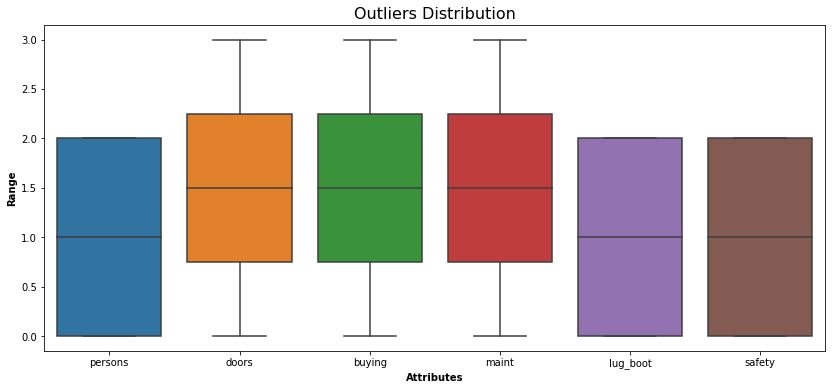

In [6]:
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df , orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(car_evaluation_)

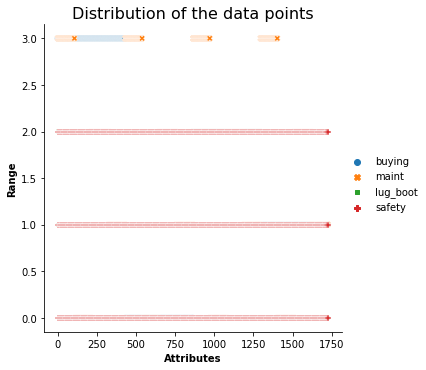

In [7]:
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.relplot(data = df)
  plt.title("Distribution of the data points", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(car_evaluation_.iloc[:,2:])

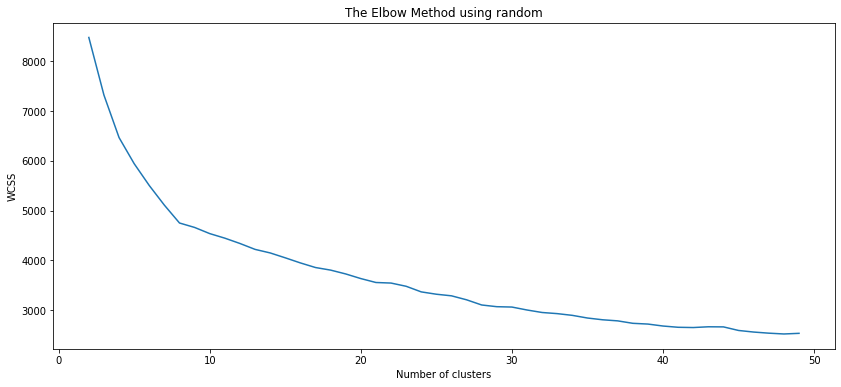

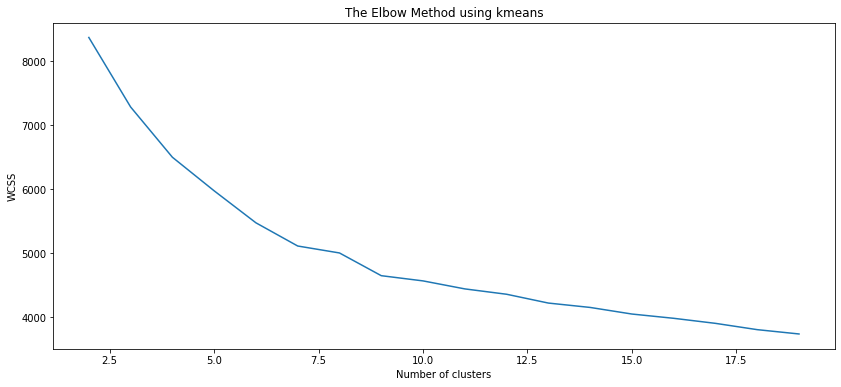

In [8]:
from sklearn.cluster import KMeans
wcss1 = []
wcss=[]
for i in range(2, 50):
  kmeans = KMeans(n_clusters = i, init ='random',  n_init = 1, random_state = 10)
  kmeans.fit(car_evaluation_)
  wcss1.append(kmeans.inertia_)
plt.plot(range(2, 50), wcss1)
plt.title('The Elbow Method using random')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

for i in range(2, 20):
  kmeans = KMeans(n_clusters = i, init ='k-means++', n_init = 1, random_state = 10)
  kmeans.fit(car_evaluation_)
  wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.title('The Elbow Method using kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

For n_clusters = 2 The average silhouette_score is : 0.14239886225783008
For n_clusters = 3 The average silhouette_score is : 0.14969030956399537
For n_clusters = 4 The average silhouette_score is : 0.1561408231687833
For n_clusters = 5 The average silhouette_score is : 0.14885567752443254
For n_clusters = 6 The average silhouette_score is : 0.1540849815169391
For n_clusters = 7 The average silhouette_score is : 0.1485187942262968
For n_clusters = 8 The average silhouette_score is : 0.1477930551545859
For n_clusters = 9 The average silhouette_score is : 0.13592758120442164
For n_clusters = 10 The average silhouette_score is : 0.13008326380426
For n_clusters = 11 The average silhouette_score is : 0.12773087440830141
For n_clusters = 12 The average silhouette_score is : 0.13792073602462726
For n_clusters = 13 The average silhouette_score is : 0.1368255055727254
For n_clusters = 14 The average silhouette_score is : 0.1366778197475484
For n_clusters = 15 The average silhouette_score is : 0

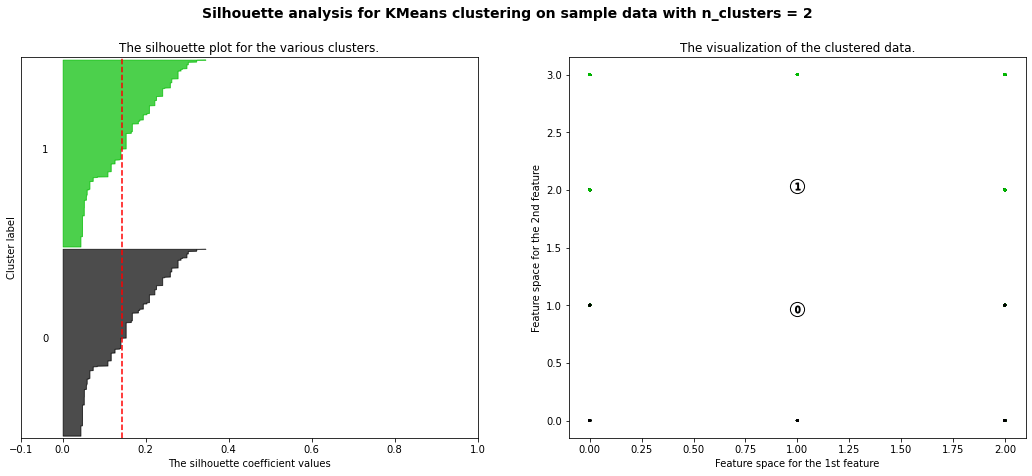

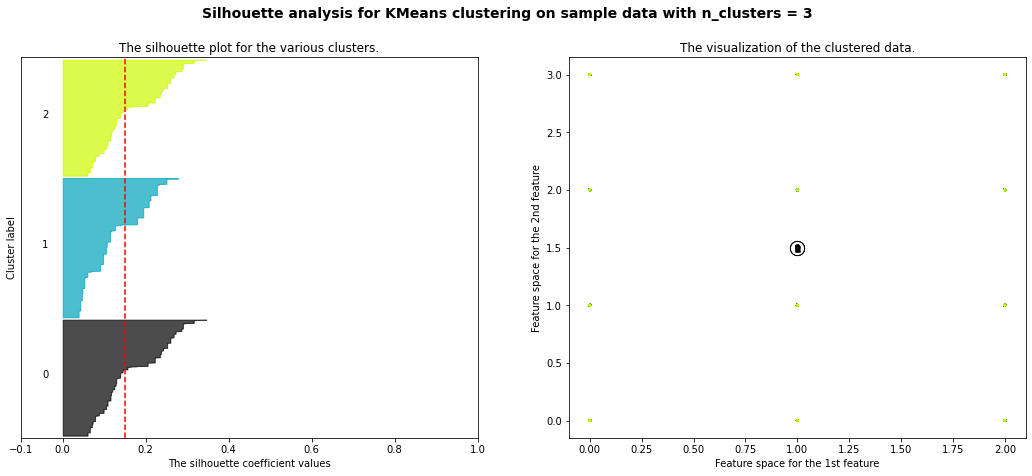

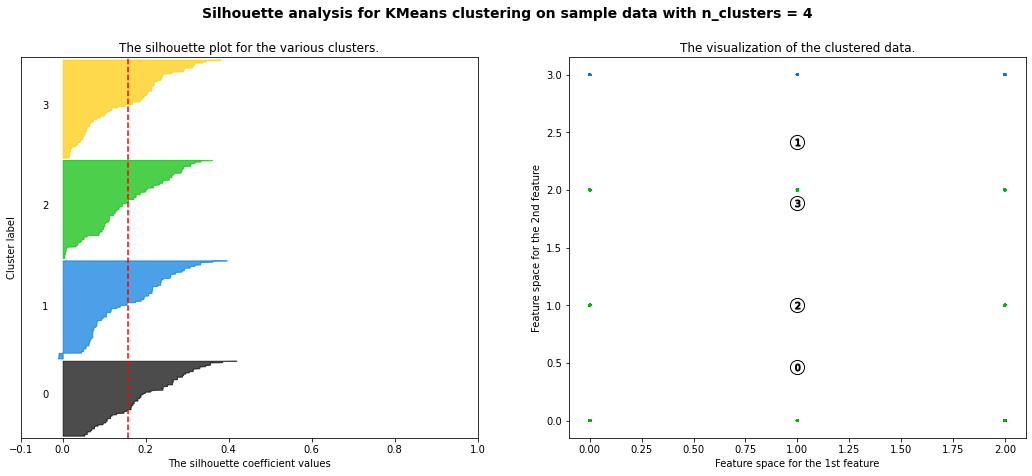

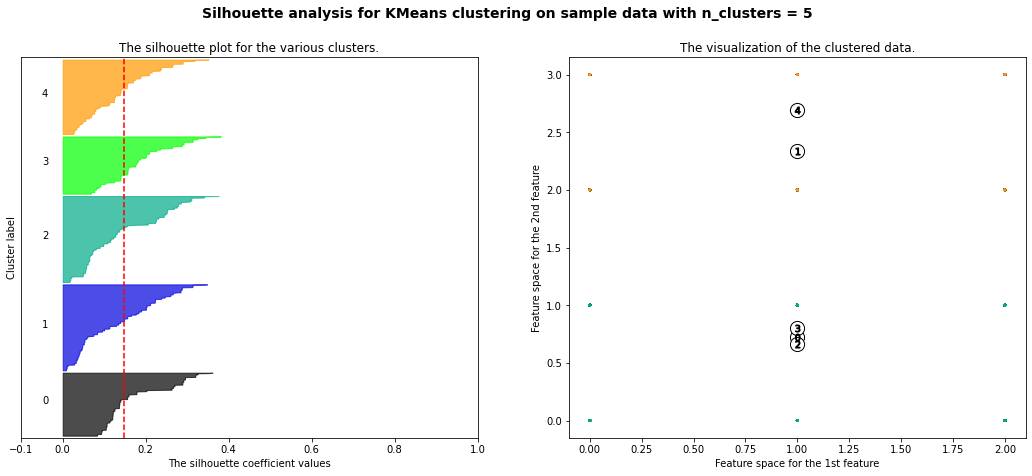

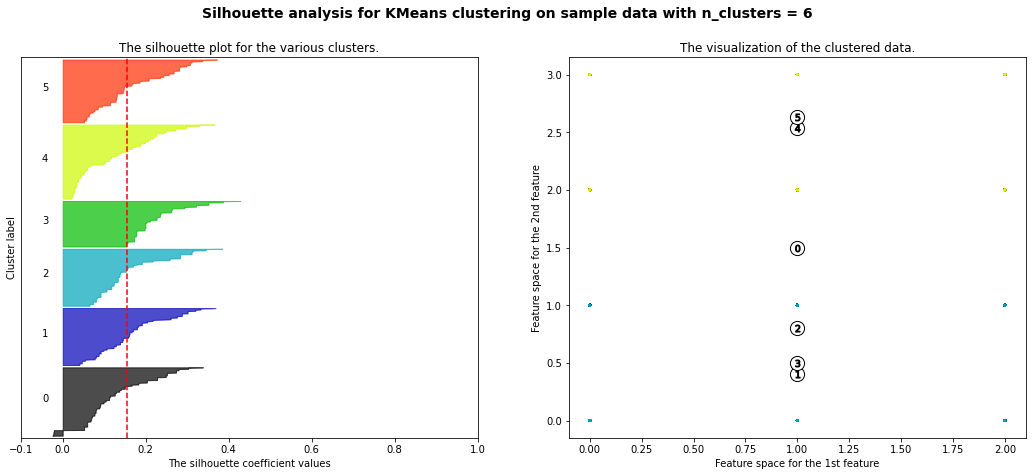

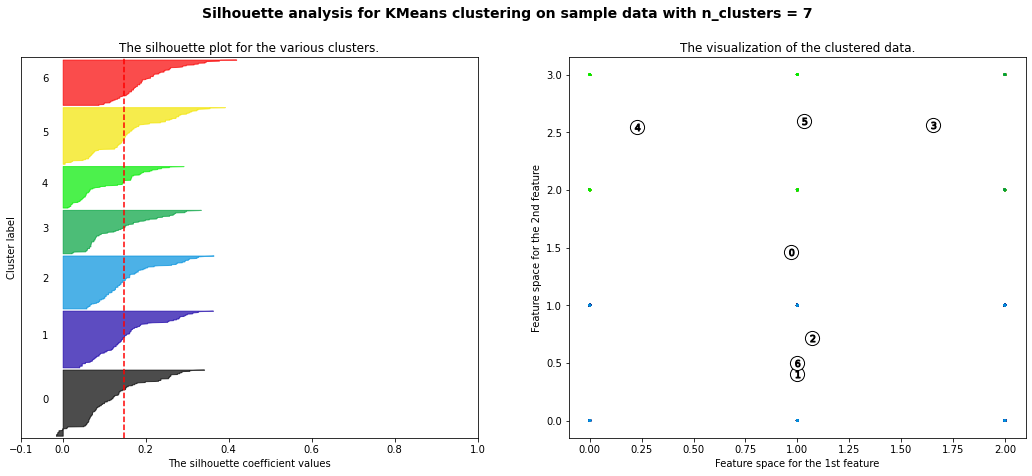

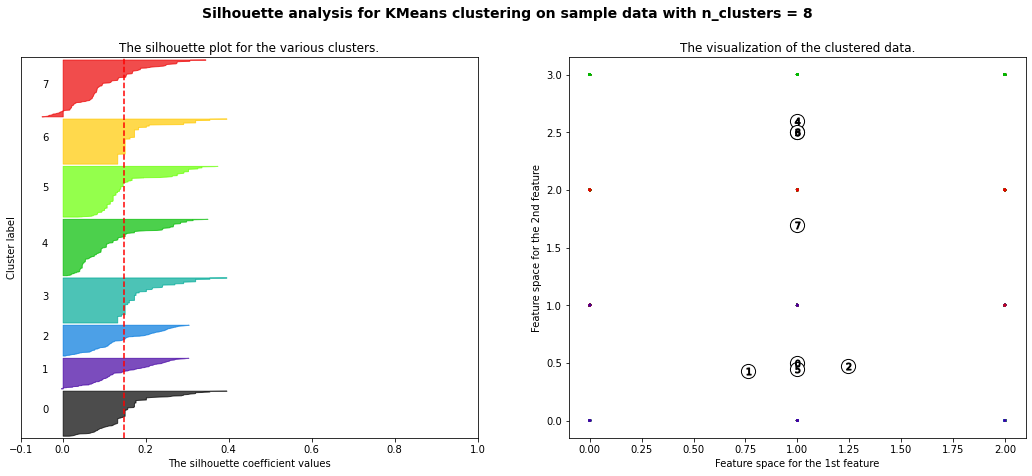

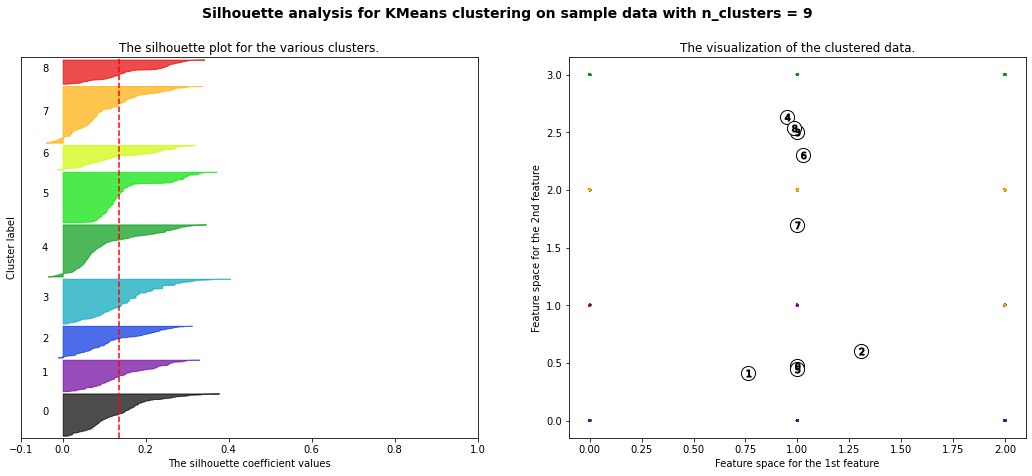

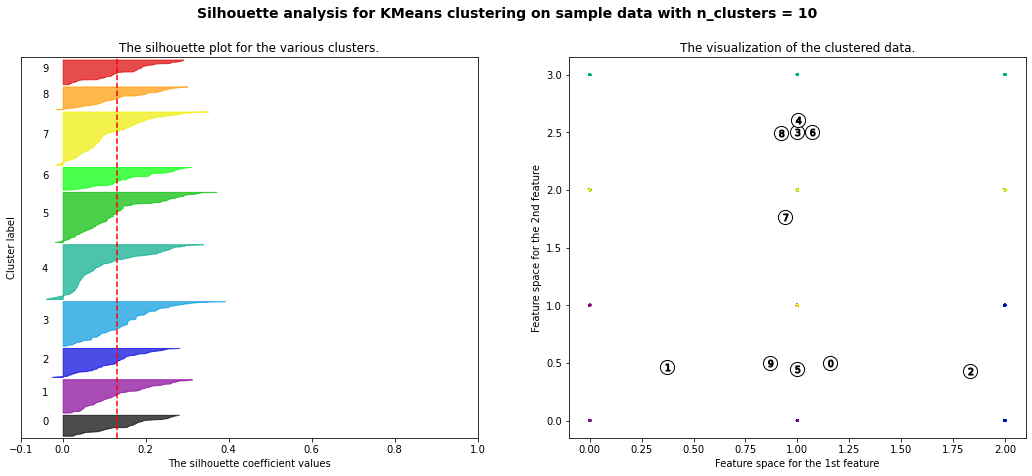

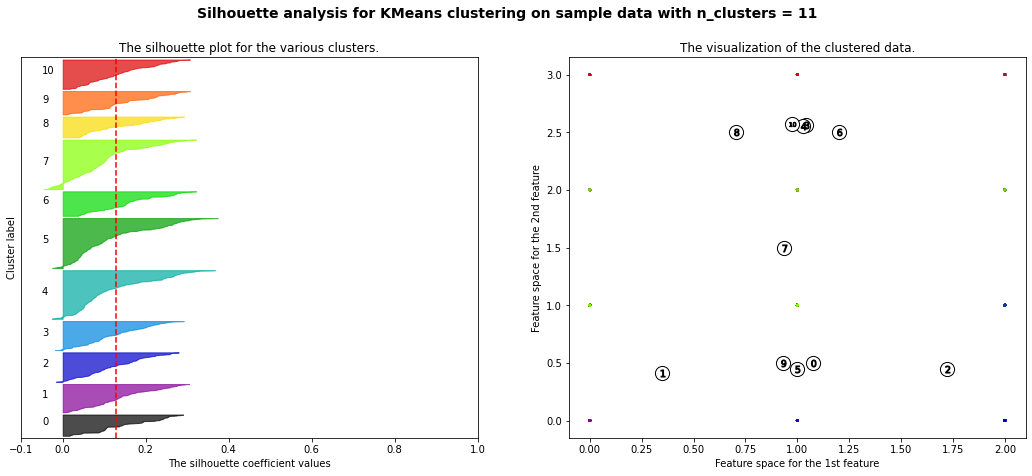

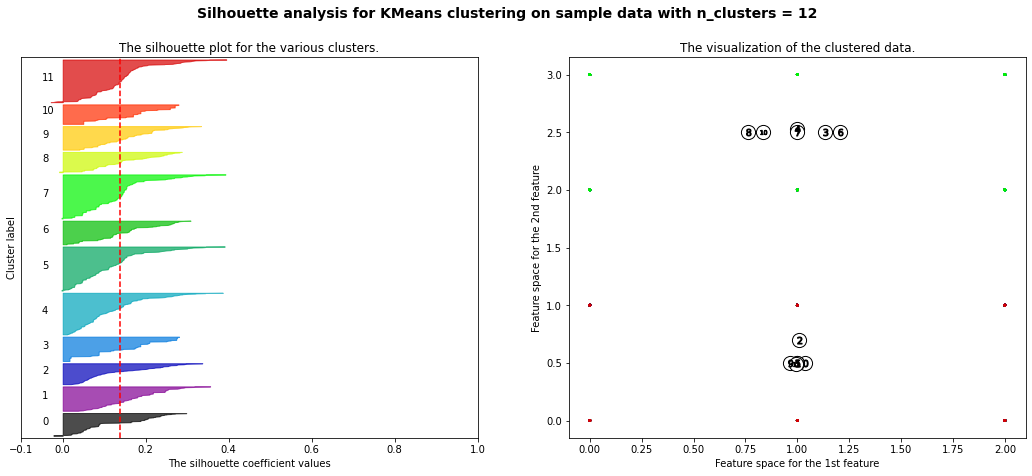

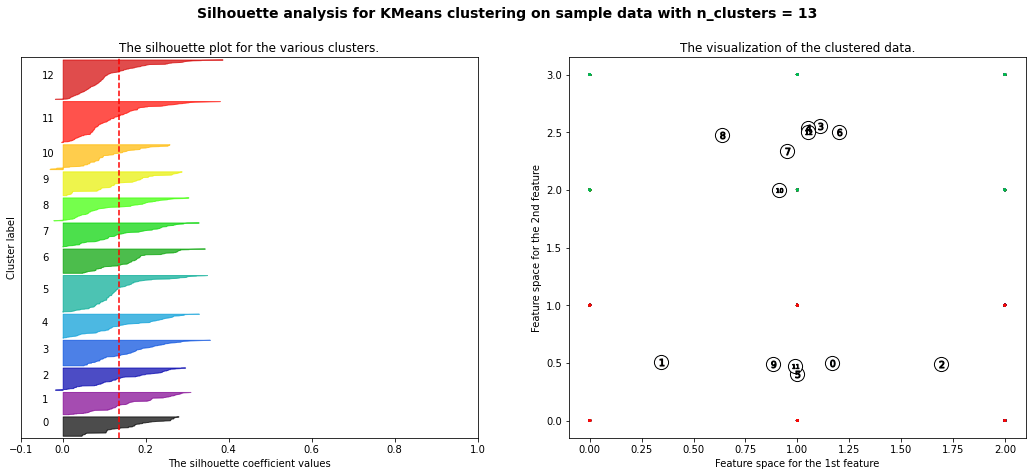

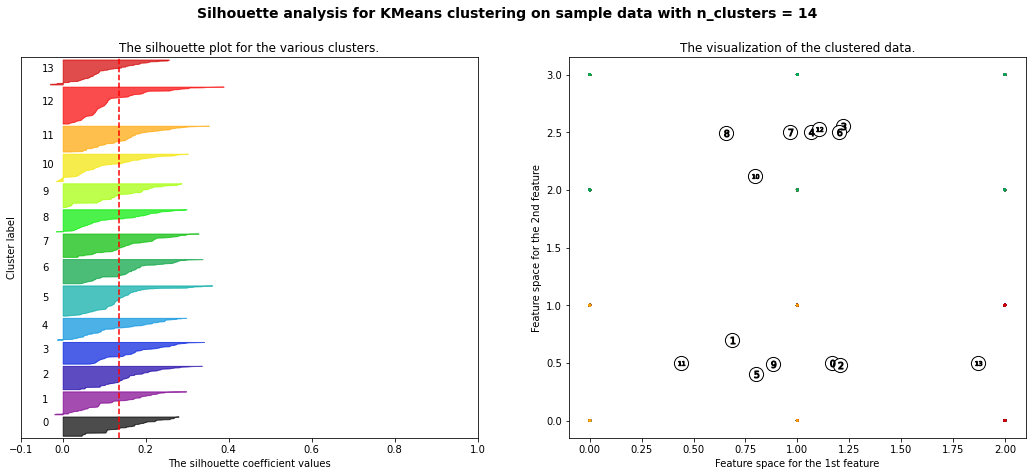

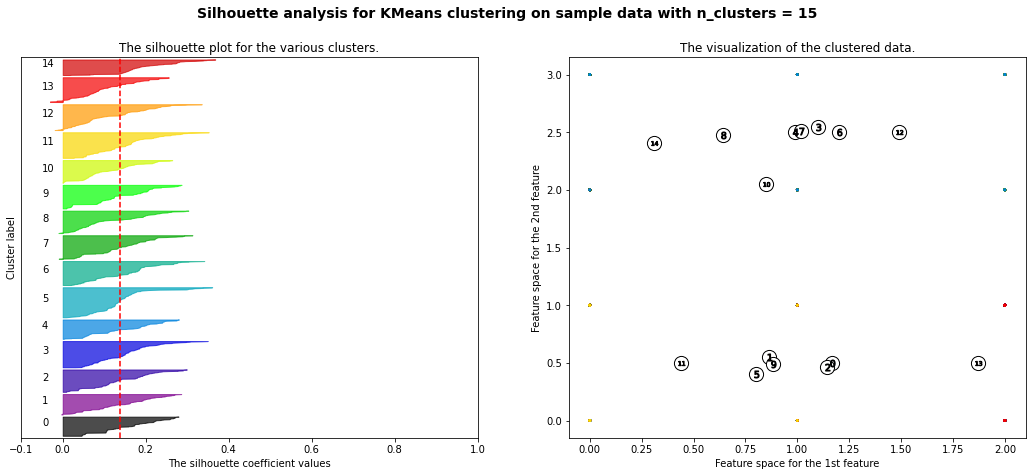

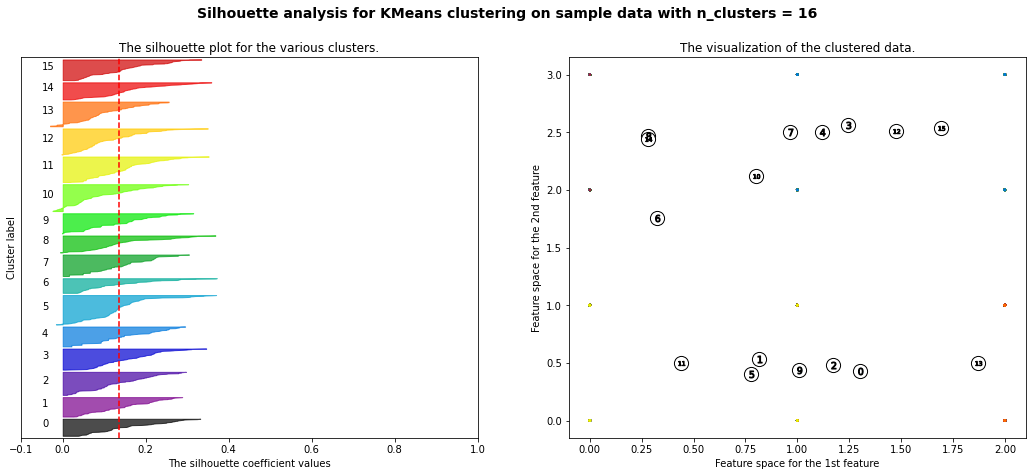

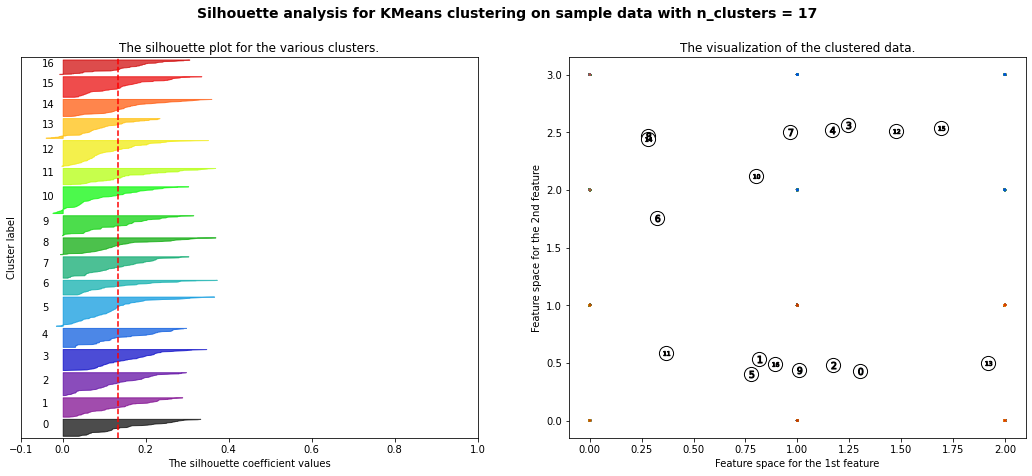

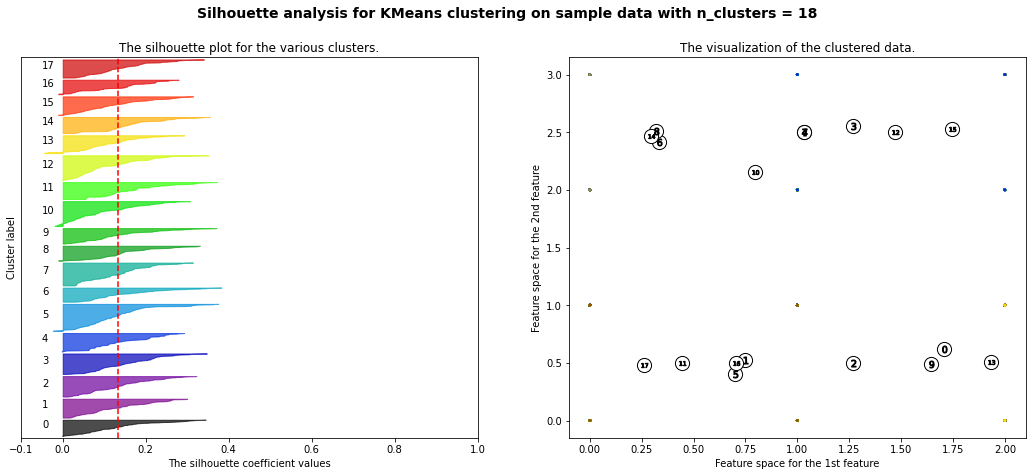

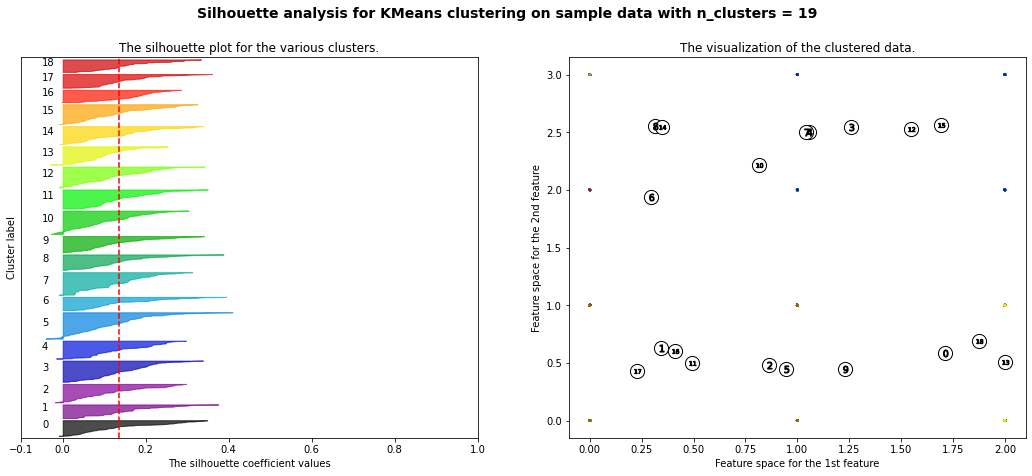

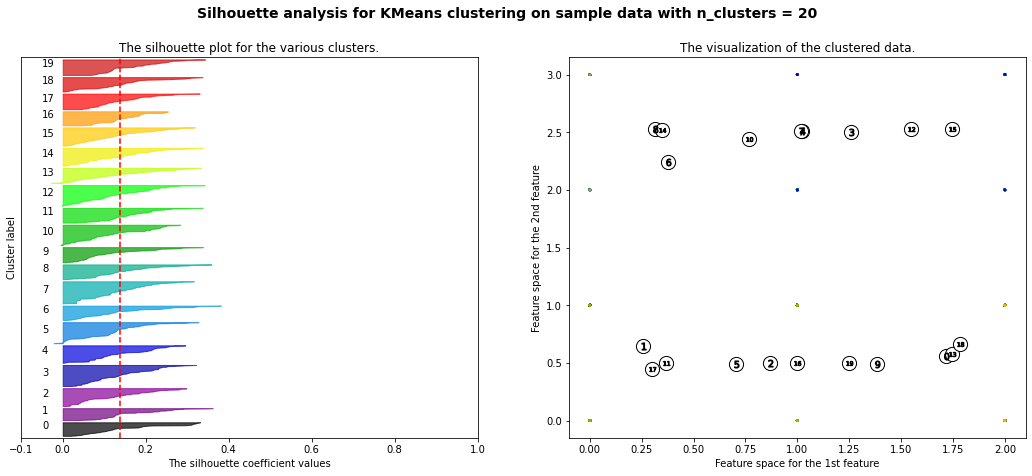

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.cm as cm

range_n_clusters = [x for x in range(2,21)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(car_evaluation_) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    cluster_labels = clusterer.fit_predict(car_evaluation_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(car_evaluation_, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(car_evaluation_, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        car_evaluation_.iloc[:, 0], car_evaluation_.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
 
# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
 
# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 8).fit(car_evaluation_)
 
# print the class labels
print(clustering.labels_)

[5 5 5 ... 4 4 4]


### **P**rincipal **C**omponent **A**nalysis

The Principal Components are a straight line that captures most of the variance of the data. They have a direction and magnitude. Principal components are orthogonal projections (perpendicular) of data onto lower-dimensional space.

In [11]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(car_evaluation_)
carEvaluation = pd.DataFrame(X_principal)
carEvaluation.columns = ['P1', 'P2']

In [12]:
  kmeans = KMeans(n_clusters = 4, init ='k-means++', max_iter = 300, n_init = 1, random_state = 42)
  clusters_arr = kmeans.fit_predict(car_evaluation_)

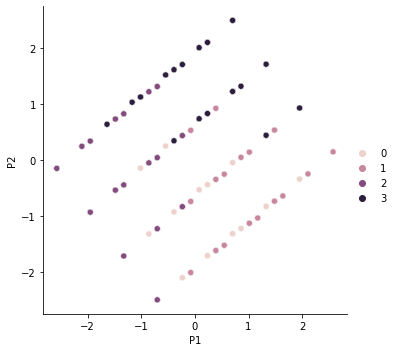

In [13]:
sns.relplot(x='P1',y='P2',data = carEvaluation, hue = clusters_arr )

## **D**endrogram 

A diagram representing the arragement of clusters or relation between any kinds of entities to measure the similarity

#### **L**inkages :
different approaches to measure the distance between two sub-clusters of data point.


1.  **C**omplete clustering
    > Maximum distance between two points in different clusters

$L(R,S) = max(D(i,j)), i \in R, j \in S$

Note : R and S are two clusters

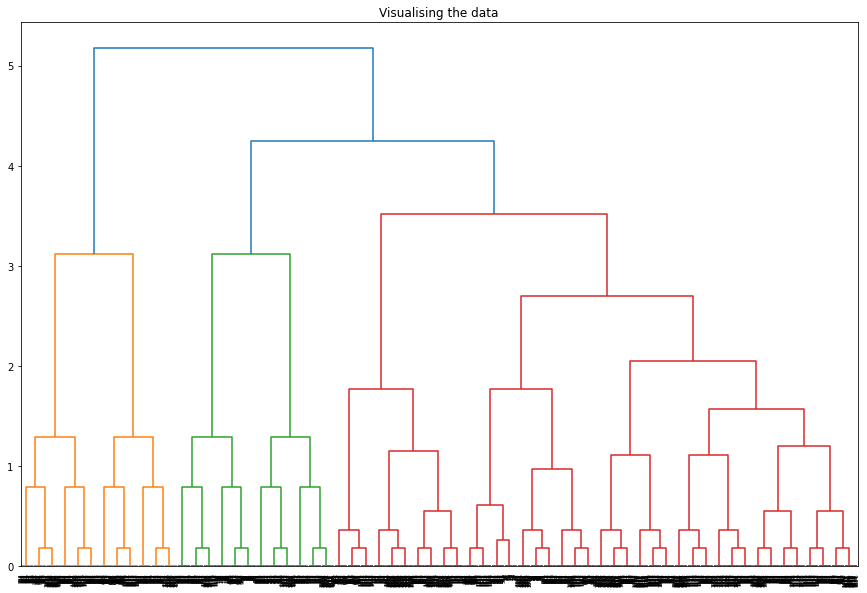

In [14]:
plt.figure(figsize =(15, 10))
plt.title('Visualising the data')
clustering=[]
methods = ['complete','average','single','weighted','centroid']
for m in methods:
  clustering.append(linkage(carEvaluation, method=m, metric="euclidean"))

Dendrogram = dendrogram(clustering[0])


 2. **A**verage Clustering
 For two clusters R and S, taking distance between eaach pair of observations in each cluster are added up and divided by the number of pairs to get average inter-cluster distance

 $L(R,S) = \frac{1}{n_{R} + n_{S}} \sum_{i=1}^{n_{R}} \sum_{j=1}^{n_{S}} D(i,j), i \in R, j \in S$

Note: 
- $n_{R}$ - number of data points in R
- $n_{S}$ - number of data points in S

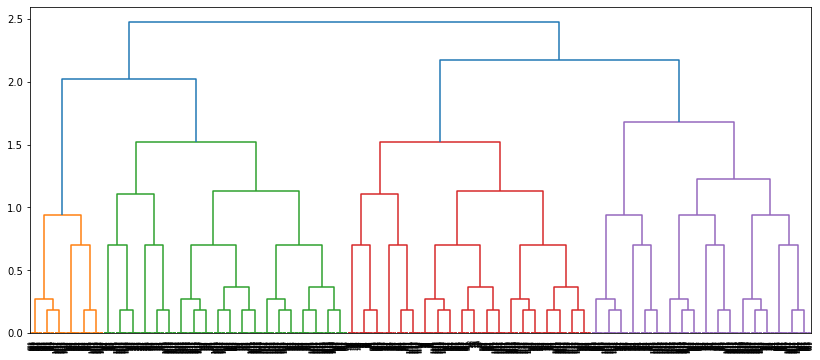

In [15]:
Dendrogram = dendrogram(clustering[1])


3. **S**ingle Clustering

Minimum distance between two points 

$L(R,S) = min(D(i,j)), i \in R, j \in S$

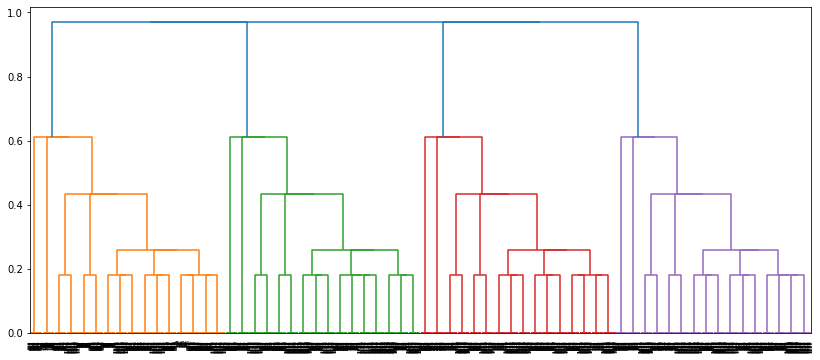

In [16]:
Dendrogram = dendrogram(clustering[2])

4. **W**eighted Clustering

nearest clusters are combined into a higher-level cluster and then its distance to another cluster k is arithematic mean of the average distance between members of k and i, and k and j. 

$ L((R,S),P) = \frac{D(k,i) + D(j,i)}{2}$




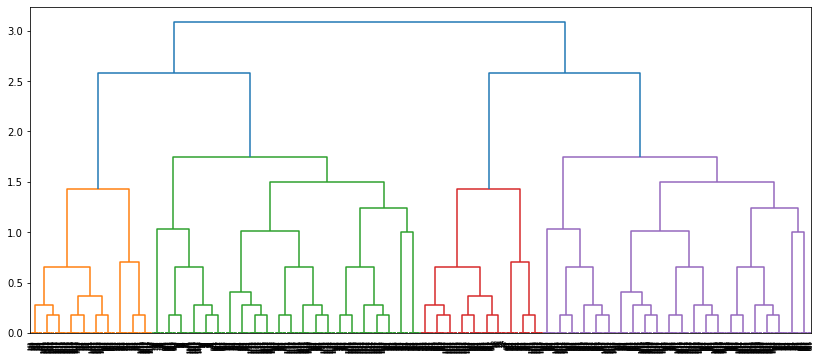

In [17]:
Dendrogram = dendrogram(clustering[3])


5. **C**entroid clustering 

distance between the centroids of two different clustering 

$L(R,S) = ||c_{R} - c_{S}||_{2}$

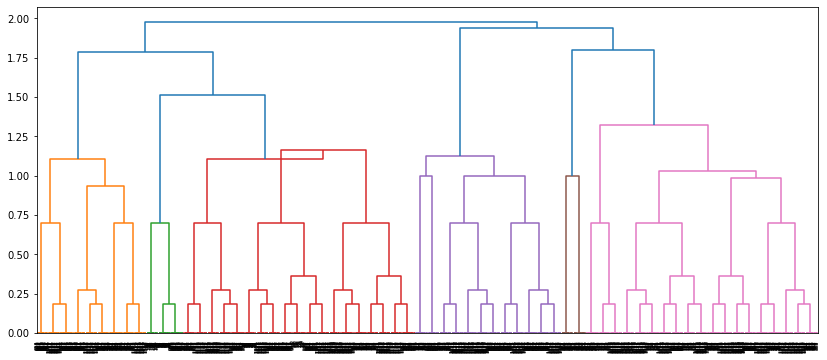

In [18]:
Dendrogram = dendrogram(clustering[4])


#### Inference :
In dendrogram, if the colors specify optimal number of clusters, then k = 4


### Comparing KMeans and Agglomarative clustering

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder

X = carEvaluation.copy()

# Evaluate optimal number of clusters
kmeans_scores = []
agg_scores = []
for k in range(2, 20):
  
    # KMeans clustering
    kmeans = KMeans(n_clusters=i, init = 'k-means++',n_init=1,random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_silhouette = silhouette_score(X, kmeans_labels)
    kmeans_calinski_harabasz = calinski_harabasz_score(X, kmeans_labels)
    kmeans_davies_bouldin = davies_bouldin_score(X, kmeans_labels)

    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=i)
    agg_labels = agg.fit_predict(X)
    agg_silhouette = silhouette_score(X, agg_labels)
    agg_calinski_harabasz = calinski_harabasz_score(X, agg_labels)
    agg_davies_bouldin = davies_bouldin_score(X, agg_labels)

    kmeans = KMeans(n_clusters=k, n_init=1,random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_scores.append(silhouette_score(X, kmeans_labels))
    
    agg = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg.fit_predict(X)
    agg_scores.append(silhouette_score(X, agg_labels));

kmeans_optimal_k = kmeans_scores.index(max(kmeans_scores)) + 2
agg_optimal_k = agg_scores.index(max(agg_scores)) + 2
print('-'*50)
print()
# Print results
print(f"KMeans:\nSilhouette Score: {kmeans_silhouette:.3f}, Calinski-Harabasz Index: {kmeans_calinski_harabasz:.3f}, Davies-Bouldin Index: {kmeans_davies_bouldin:.3f}")
print(f"Agglomerative Clustering:\nSilhouette Score: {agg_silhouette:.3f}, Calinski-Harabasz Index: {agg_calinski_harabasz:.3f}, Davies-Bouldin Index: {agg_davies_bouldin:.3f}")
print()
print(f"Optimal number of clusters (KMeans): {kmeans_optimal_k}")
print(f"Optimal number of clusters (Agglomerative Clustering): {agg_optimal_k}")

--------------------------------------------------

KMeans:
Silhouette Score: 0.557, Calinski-Harabasz Index: 2568.668, Davies-Bouldin Index: 0.565
Agglomerative Clustering:
Silhouette Score: 0.606, Calinski-Harabasz Index: 3077.051, Davies-Bouldin Index: 0.532

Optimal number of clusters (KMeans): 19
Optimal number of clusters (Agglomerative Clustering): 19


### Inference : 

- According to **Silhouette score**,optimal number of clustering is given by the highest Silhouette score.
- According to **Calinski-Harabasz Index**,optimal number of clustering is given by the highest Calinski-Harabasz Index.
- According to **Davies-Bouldin Index**,optimal number of clustering is given by the lowest Davies-Bouldin Index.


> Kmeans clustering is a better way of clustering as it gives us a higher number of silhouette score. 

> Agglomerative clustering is better way of clustering as Calinski-Harabasz Index and Davies-Bouldin Index are higher and lower respectively.

> As the optimal value of the clusters by both the method is same, optimal number of clusters is 19.

### **H**yperparameter tunning

#### For KMeans

In [20]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'n_clusters': [2, 3, 4, 5,7,8],
              'max_iter': [50, 100, 200],
              'init': ['k-means++', 'random'],
              'algorithm': ['auto', 'full']}

# Create a KMeans object
kmeans = KMeans();

# Perform grid search with cross-validation
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X)



GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [50, 100, 200],
                         'n_clusters': [2, 3, 4, 5, 7, 8]})

In [21]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'algorithm': 'full', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8}


#### For Agglomerative clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV

# Generate example data
#X, y = make_blobs(n_samples=1000, centers=3, random_state=42)

# Define the parameter grid
param_grid = {'n_clusters': [2, 3, 4, 5, 7, 8, 10],
              'metric': ['euclidean', 'manhattan', 'cosine'],
              'linkage': ['ward', 'complete', 'average', 'single']}

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering()

# Perform grid search with cross-validation
grid_search = GridSearchCV(agg_clustering, param_grid, cv=5,scoring=silhouette_score)
grid_search.fit(X)

GridSearchCV(cv=5, estimator=AgglomerativeClustering(),
             param_grid={'linkage': ['ward', 'complete', 'average', 'single'],
                         'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_clusters': [2, 3, 4, 5, 7, 8, 10]},
             scoring=<function silhouette_score at 0x7f8b6b384940>)

In [23]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 2}


### **C**omparing Clustering and Classification

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Load customer purchase data
X = car_evaluation_

# Perform feature engineering and preprocessing, if necessary
# ...

# Perform clustering to group similar customers based on their purchasing behavior
#X = df.drop('class', axis=1)
kmeans = KMeans(n_clusters=4, random_state=10)
clusters = kmeans.fit_predict(X)

# Evaluate the clustering using silhouette score
score = silhouette_score(X, clusters)

# Perform classification to predict if a customer will make a purchase
y = OE.fit_transform(car_evaluation[['class']])
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1, 1), test_size=0.3, random_state=10)

# Logistic Regression
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

In [25]:
print('Silhouette score:', score)

Silhouette score: 0.15778313831918372


In [26]:
print('Logistic Regression score:', lr_score)

Logistic Regression score: 0.6955684007707129


### Inference :    
From the above observation, we can say that logistic regression is better algorithm to classiy the given dataset 

### **D**ecision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='gini',max_depth = 19, min_samples_split = 8)

# fit the classifier to the training data
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9633911368015414


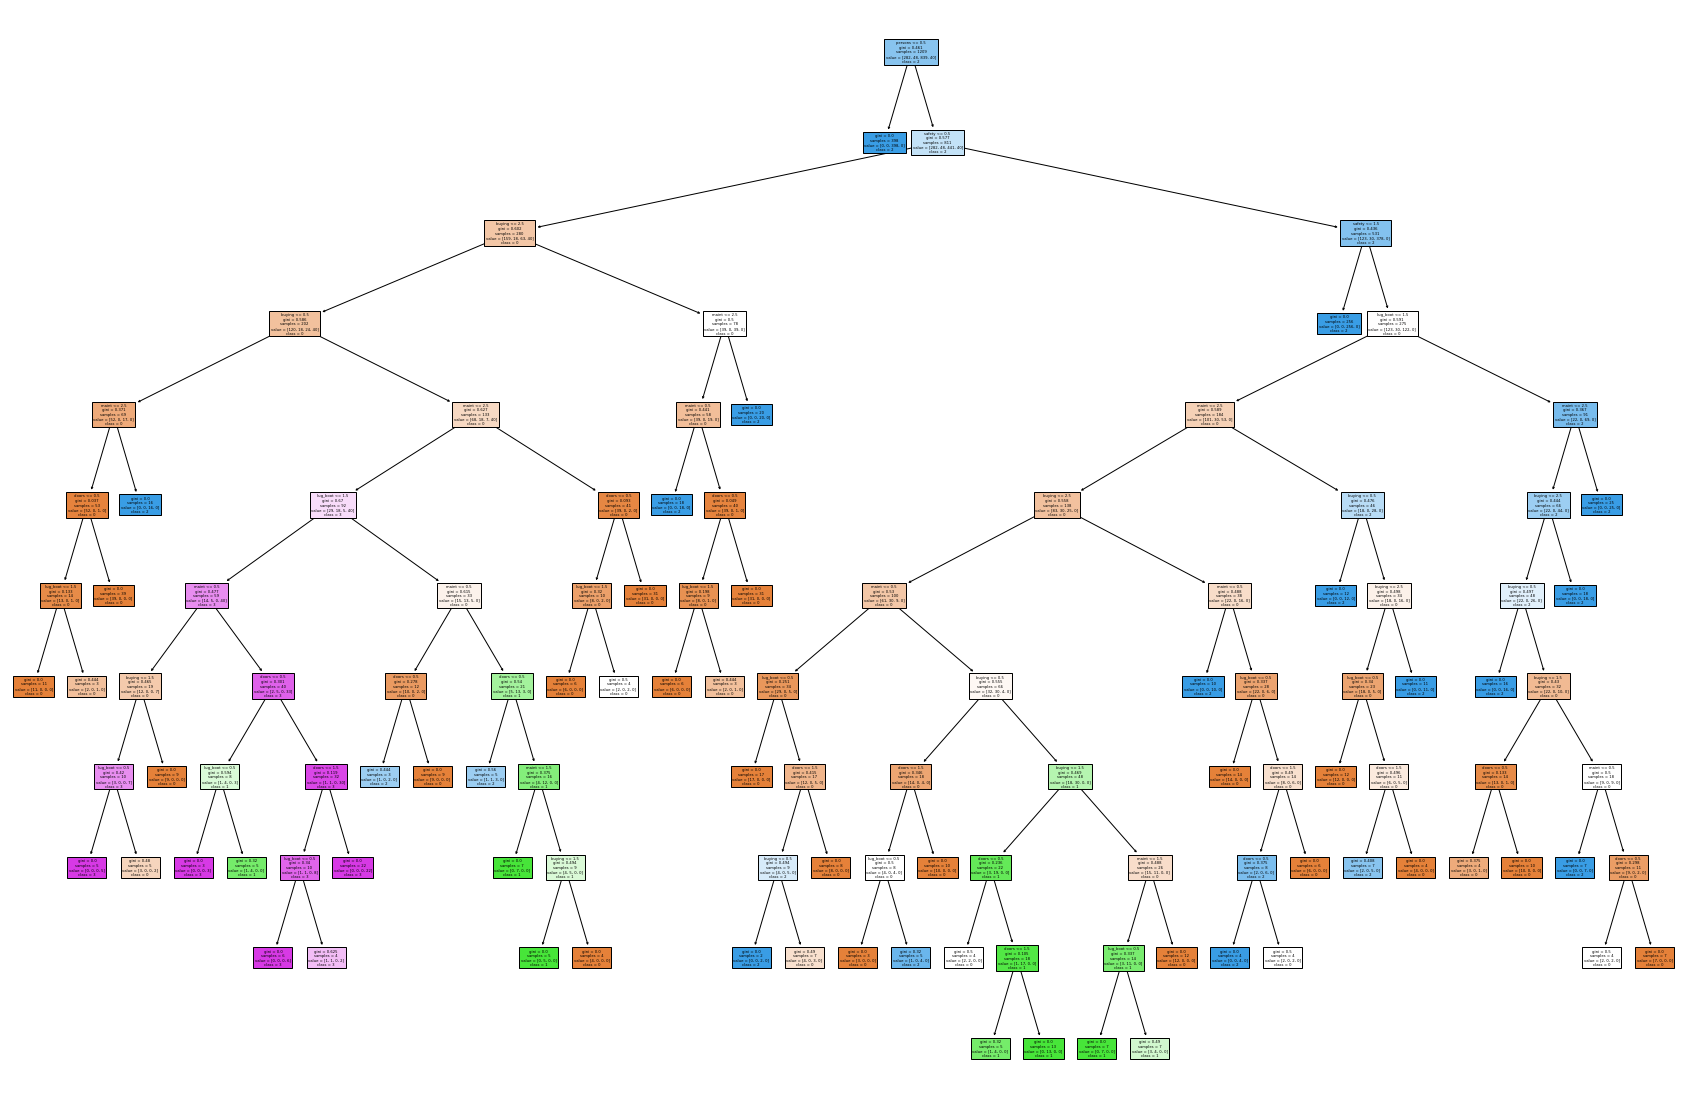

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# inspect the decision tree
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['0','1','2','3'])
plt.show()

In [29]:
np.unique(y_pred, return_counts=True)

(array([0., 1., 2., 3.]), array([107,  17, 371,  24]))

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print(classification_report(y_test, y_pred))

Confusion matrix

 [[ 97   2   3   0]
 [  2  15   2   2]
 [  5   0 366   0]
 [  3   0   0  22]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       102
         1.0       0.88      0.71      0.79        21
         2.0       0.99      0.99      0.99       371
         3.0       0.92      0.88      0.90        25

    accuracy                           0.96       519
   macro avg       0.92      0.88      0.90       519
weighted avg       0.96      0.96      0.96       519



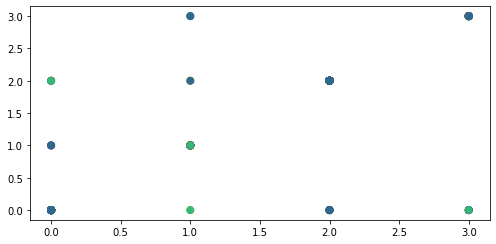

In [31]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(y_test, y_pred, c=clusters[:519], s=50)

plt.show()

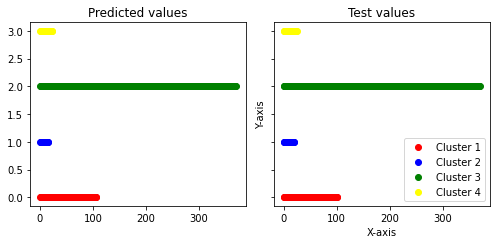

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Create the first scatter plot
ax1.scatter([x for x in range(len(y_pred[y_pred==0]))], y_pred[y_pred==0], c='red', label='Cluster 1')

# Create the second scatter plot on the same axis
ax1.scatter([x for x in range(len(y_pred[y_pred==1]))], y_pred[y_pred==1], c='blue', label='Cluster 2')

# Create the first scatter plot
ax1.scatter([x for x in range(len(y_pred[y_pred==2]))], y_pred[y_pred==2], c='green', label='Cluster 3')

# Create the second scatter plot on the same axis
ax1.scatter([x for x in range(len(y_pred[y_pred==3]))], y_pred[y_pred==3], c='yellow', label='Cluster 4')
ax1.set_title("Predicted values")

# Create the first scatter plot
ax2.scatter([x for x in range(len(y_test[y_test==0]))], y_test[y_test==0], c='red', label='Cluster 1')

# Create the second scatter plot on the same axis
ax2.scatter([x for x in range(len(y_test[y_test==1]))], y_test[y_test==1], c='blue', label='Cluster 2')

# Create the first scatter plot
ax2.scatter([x for x in range(len(y_test[y_test==2]))], y_test[y_test==2], c='green', label='Cluster 3')

# Create the second scatter plot on the same axis
ax2.scatter([x for x in range(len(y_test[y_test==3]))], y_test[y_test==3], c='yellow', label='Cluster 4')
ax2.set_title("Test values")
plt.legend()

# Set the axis labels
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

### Inference :          
- By the above score and confusion matrix we can say that Decision tree gives us more precise clusters. (when max_depth is **19**)
- Using different optimal value of k; we got different values for k, which either means the data is too homogeneou
  - in the given dataset, some columns are exact replica of the other column

- changing the hyperparameter also changes the number of optimal clusters
- As we know classification and clustering a two different machine learning model; one is for unsupervised learning and the other one is for supervised learning
- we can't compare which one is better but in this case secnario we should use classification as we don't know the label for the clusters
- Using random forest might help as well as it is multiple decision trees; we can get better and accurate model for the dataset

- optimal number of k is 4 using k means but 8 using silhouette graph

- the safety is one of the most important attribute for finding which car is better.